##Denoising Auto-Encoder for mnist images

importing necessary libraries and modules for building and training neural network models, as well as for data visualization.

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#This is unsupervised learning so the labels are not needed

(X_train, _), (X_test, _) = mnist.load_data()


#Normalize our data
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

#Make noisy data
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

#Normalize noisy data between 0 and 1
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
#Transfer the images to vector as there is dense in the model
X_train = X_train.reshape(len(X_train), 784)
X_test = X_test.reshape(len(X_test), 784)

X_train_noisy = X_train_noisy.reshape(len(X_train_noisy), 784)
X_test_noisy = X_test_noisy.reshape(len(X_test_noisy), 784)

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [5]:
#Designing the model
input_img = Input(shape=(784,))
encoder = Dense(units=32, activation='relu')(input_img)
decoder = Dense(units=784, activation='sigmoid')(encoder)

autoencoder = Model(input_img, decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [6]:
#Train the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train_noisy, X_train,
                epochs=30,
                batch_size=256)

Epoch 1/30
235/235 [==============================] - 4s 12ms/step - loss: 0.2837
Epoch 2/30
235/235 [==============================] - 3s 12ms/step - loss: 0.2010
Epoch 3/30
235/235 [==============================] - 4s 15ms/step - loss: 0.1748
Epoch 4/30
235/235 [==============================] - 3s 13ms/step - loss: 0.1603
Epoch 5/30
235/235 [==============================] - 3s 12ms/step - loss: 0.1509
Epoch 6/30
235/235 [==============================] - 3s 11ms/step - loss: 0.1433
Epoch 7/30
235/235 [==============================] - 3s 12ms/step - loss: 0.1383
Epoch 8/30
235/235 [==============================] - 4s 16ms/step - loss: 0.1351
Epoch 9/30
235/235 [==============================] - 3s 11ms/step - loss: 0.1331
Epoch 10/30
235/235 [==============================] - 3s 11ms/step - loss: 0.1318
Epoch 11/30
235/235 [==============================] - 3s 11ms/step - loss: 0.1310
Epoch 12/30
235/235 [==============================] - 4s 15ms/step - loss: 0.1305
Epoch 13/30
2

In [7]:
#Feature layer layer 
encoder_model = Model(input_img, encoder)
encoder_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [8]:
pred = autoencoder.predict(X_test_noisy)
encoded_images = encoder_model.predict(X_test_noisy)

313/313 [==============================] - 1s 1ms/step


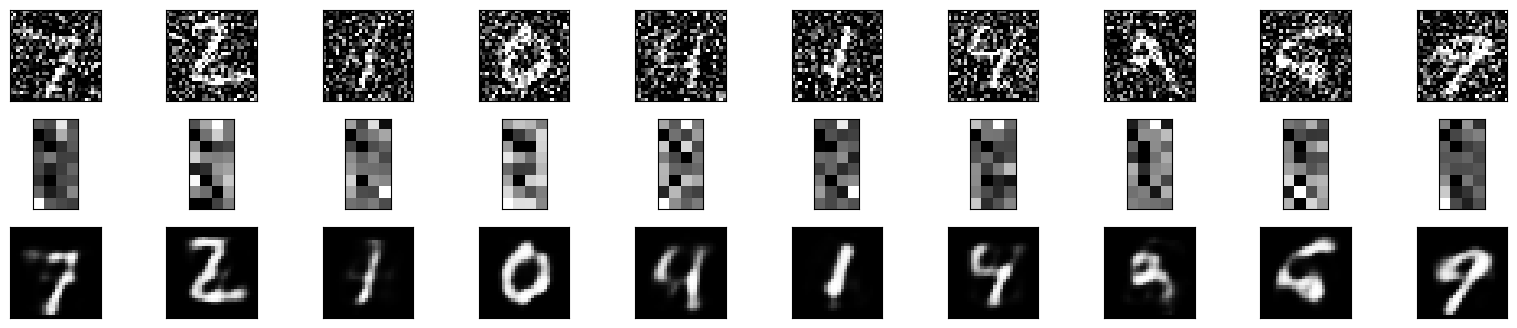

In [9]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_images[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()